---
# Linear Regression: Case study
---

## Up to now...

- How to use **`Pandas`** library to read data?
- How to use **`Seaborn`** library to visualize data?
- What is **linear regression**, and how does it work?
- What are some **evaluation metrics** for regression problems?

## Agenda
- How to **train** and **interpret** a linear regression model in **`Scikit-learn`**?
- How to choose **which features to include** in the **linear model**?

---
# Reading data using Python Pandas
---
**Pandas:** Python library for data exploration, manipulation, and analysis

Primary object types:
- **`Series`**: a single column
- **`DataFrame`**: rows and columns (like a spreadsheet)
- **`Panel`**: 3-dimensional array



In [1]:
# conventional way to import pandas
import pandas as pd

In [2]:
# read CSV file directly from a URL and save the results
advertising = pd.read_csv("./datasets/Advertising.csv", index_col=0)
#pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')

In [3]:
# We can explore the keys of this object
advertising.keys()

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [4]:
# display the first 5 rows
advertising.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
# display the last 5 rows
advertising.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


There are **200 observations** (represented by the rows)
- each observation *represents* a **single market**

In [6]:
# check the shape of the DataFrame (rows, columns)
advertising.shape

(200, 4)

## What are the features ?
Features or **independent variables** are also known as explanatory, predictors, or factor variables.
- **TV:** advertising dollars (in thousands of dollars) spent on TV for a single product in a given market or city 
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

***Example***:  Market '200'

In [7]:
advertising.loc[200,['TV','Radio', 'Newspaper']]

TV           232.1
Radio          8.6
Newspaper      8.7
Name: 200, dtype: float64

## What is the response ?
Response or **dependent variables** are also known as outcomes, predicted, or criterion variables.
- **Sales:** sales of a single product in a given market (in thousands of items)




In [8]:
advertising.loc[200,['Sales']]

Sales    13.4
Name: 200, dtype: float64

## What else do we know?
Because the **response variable** is **continuous**, 
this is a **regression** problem

Types of **supervised learning**
- **Classification:** Predict a categorical response
- **Regression:** Predict a continuous response

---
# Visualizing data using seaborn
---
**Seaborn:** Python library for **statistical data visualization** built on top of **Matplotlib**

In [9]:
# conventional way to import seaborn
import seaborn as sns

# magic command allowing plots to appear within the notebook
%matplotlib inline

Let's ***visualize*** the **relationship** between the **features** and the **response** using **`scatterplots`**

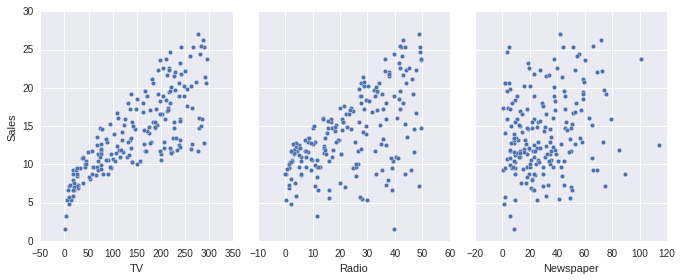

In [10]:
sns.pairplot(data= advertising, 
             x_vars= ['TV','Radio','Newspaper'], 
             y_vars= ['Sales'],
             size=4, aspect=0.8, kind='scatter')

> **NOTE**: 
+ There is *some **relationship*** between **`TV`** and **`Sales`** 
    + as **`TV`** advertising increases, **`Sales`** also increases 
+ there appears to be a ***less strong relationship*** between **`Radio`** and **`Sales`**
+ there is a ***very week relationship*** between **`Newspaper`** and **`Sales`**.

#### We can get a quantitative measure of these *relationship*

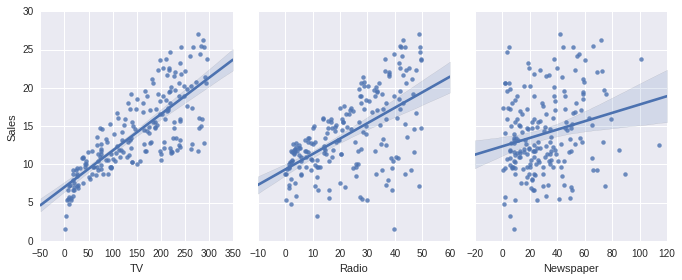

In [11]:
sns.pairplot( data= advertising, 
              x_vars= ['TV','Radio','Newspaper'], 
              y_vars= 'Sales',
              size=4, aspect=0.8, kind='reg')

> **`Seaborn`** ***automagically*** adds a **line of best fit** as well as a **95% confidence interval** (band) 
+ i.e., **`Seaborn`** is assuming a **linear relationship** between each pair of variables.

---
# General form of *linear regression*
---

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the **response**
- $\beta_0$ is the **intercept** (when $x_i = 0$, $y$ is ***expected*** to equal the intercept)
- $\beta_1$ is the **coefficient** for $x_1$ (the $1$st feature)
- $\beta_n$ is the **coefficient** for $x_n$ (the $n$th feature)


In this **case study**:

$$
\mathbf{Sales} = \beta_0 + \beta_1 \mathbf{TV} 
+ \beta_2 \mathbf{Radio} + \beta_3 \mathbf{Newspaper}
$$

where the $\beta$ values are the **model coefficients**. 
+ these values are ***learned*** during the **model fitting** step using the **least squares** criterion
+ then, the **fitted model** can be used to make **predictions**!

---
# Linear regression in Python `Scikit-learn`
---
**`Scikit-learn`** is a powerful Python module for **machine learning**. 
+ It contains functions for regression, classification, clustering, model selection and dimensionality reduction. 

>  We will explore the **`sklearn.linear_model`** module which contains **methods for regression** in which the **target value** is expected to be a **linear combination of the input variables**

##  Preparing X and y using `Pandas`

**`Scikit-learn`** expects $\mathbf{X}$ (*feature matrix*) and $\mathbf{y}$ (*response vector*) to be **NumPy `arrays`**.
- however, **`Pandas`** is built on top of **`NumPy`**.
- thus, $\mathbf{X}$ can be a `Pandas DataFrame` and $\mathbf{y}$  can be a `Pandas Series`!

In [12]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']
# use the list to select a subset of the original DataFrame
X = advertising[feature_cols]

# OR a equivalent command to do this in one line
X = advertising[['TV', 'Radio', 'Newspaper']]

# print the first 5 rows
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [13]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [14]:
# select a Series from the DataFrame
y = advertising['Sales']

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [15]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## Splitting X and y into training and testing sets

In [16]:
from sklearn.model_selection import train_test_split

     help(train_test_split)
     Split arrays or matrices into random train and test subsets

Default **split** is $75\%$ for training and $25\%$ for testing

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


Let's observe the **random order** of the train/test matrices

In [19]:
# print the first 5 rowsb
X_train.head()

,TV,Radio,Newspaper
99,289.7,42.3,51.2
124,123.1,34.6,12.4
120,19.4,16.0,22.3
54,182.6,46.2,58.7
34,265.6,20.0,0.3


In [20]:
X_test.head()

,TV,Radio,Newspaper
59,210.8,49.6,37.7
41,202.5,22.3,31.6
35,95.7,1.4,7.4
103,280.2,10.1,21.4
185,253.8,21.3,30.0


## Linear regression model training

In [21]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Interpreting model coefficients

In [22]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [23]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.046564567874150295),
 ('Radio', 0.17915812245088839),
 ('Newspaper', 0.0034504647111804343)]

In our **case study**:

$$
y = 2.88 + 0.047\;\mathbf{TV} 
+ 0.179 \;\mathbf{Radio}
+ 0.0035 \;\mathbf{Newspaper}
$$

How do we interpret the **TV coefficient** (0.047)?

- For a given amount of **Radio** and **Newspaper** ad spending, **a "unit" increase in TV ad spending** is associated with a **0.0466 "unit" increase in Sales**.
    - e.g., **an additional $1,000 spent on TV ads** is ***associated*** with an **increase in sales of 46.6 items**.

Important notes:

- This is a statement of **association**, not **causation**.
- If an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Making predictions (vs.  extrapolation)

Using the **linear model** to ***predict*** the value of the response variable for a given value of the explanatory variable is called **prediction**.	

> Applying a model estimate to values outside of the realm of the original
data is called **extrapolation**
+ sometimes the **intercept** might be an extrapolation

## Confidence in our Model

**Question**: Is **linear regression** a **high-variance/low-bias** model, or a **low-variance/high-bias** model?

**Answer**: **Low-variance/high-bias**. Under repeated sampling, the line will stay roughly in the same place (**low variance**), but the average of those models won't do a great job capturing the true relationship (**high bias**).
+ Note that low variance is a useful characteristic when you don't have a lot of training data!
+ Keep in mind that we only have a **single sample** of data, and not the entire **population data**.

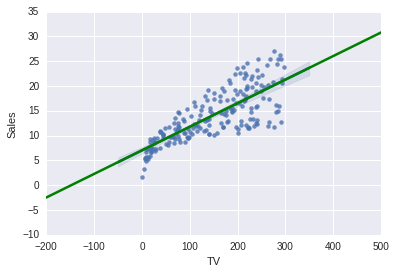

In [24]:
import numpy as np; np.random.seed(8)
import seaborn as sns
import matplotlib.pylab as plt
import scipy.stats

# train data
x = advertising['TV']
y = advertising['Sales']

ax = sns.regplot(x=x, y=y)

# extend the canvas
plt.xlim([-200,500])
plt.ylim([-10,35])

# calculate linear regression function
slope, intercept, r_value, p_value, std_err = \
scipy.stats.linregress(x=x,y=y)

# plot the regression line on the extended canvas
xlims = ax.get_xlim()
new_x = np.arange(xlims[0], xlims[1],(xlims[1]-xlims[0])/250.)
ax.plot(new_x, intercept + slope *  new_x, color='g', linestyle='-', lw = 2.5)

plt.show()

In [25]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

We need an **evaluation metric** in order to compare our predictions with the actual values!

## Model evaluation metrics for regression

In regression problems, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

In [26]:
from sklearn import metrics

# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

y = [100, 50, 30, 20]
y_hat = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [27]:
# calculate MAE by hand
#print((10 + 0 + 20 + 10)/4.)
sum([abs(a[0]-a[1])  for  a  in  zip(y,y_hat)])/4.

10.0

In [28]:
# calculate MAE using scikit-learn
print(metrics.mean_absolute_error(y, y_hat))

10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [29]:
# calculate MSE by hand
# print((10**2 + 0**2 + 20**2 + 10**2)/4.)
sum([ (a[0]-a[1])**2  for  a  in  zip(y,y_hat)])/4.

150.0

In [30]:
# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y, y_hat))

150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [31]:
# calculate RMSE by hand
#print(((10**2 + 0**2 + 20**2 + 10**2)/4.)**(1/2))

(sum([ (a[0]-a[1])**2  for  a  in  zip(y,y_hat)])/4.)**(1/2)

12.24744871391589

In [32]:
# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y, y_hat)))

12.2474487139


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

### Computing the RMSE for our Sales predictions

In [33]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


## Feature selection

Does **Newspaper** "belong" in our model? In other words, does it improve the quality of our predictions?

Let's **remove Newspaper** from the model and use train/test split with RMSE to see whether Newspaper should be kept in the model:

In [43]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = advertising[feature_cols]

# select a Series from the DataFrame
y = advertising['Sales']
        
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

print(linreg.intercept_)
print(linreg.coef_)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

2.92723732027
[ 0.04660234  0.18117959]


Let's check the **RMSE**...

In [44]:
# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.38790346994


The **RMSE** ***decreased*** when we ***removed*** **`Newspaper`** from the model. 
+ **Error** is something we want to ***minimize***, so **a lower number for RMSE is better**. 
+ thus, it is **unlikely** that this feature is useful for ***predicting*** **`Sales`**, and **should be removed from the model**.


Thus, the **linear model** for our **case study** would be:

$$
\mathbf{Sales}  = 2.927 + 0.047\;\mathbf{TV} 
+ 0.181 \;\mathbf{Radio}
$$


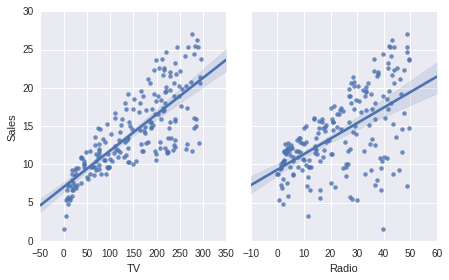

In [45]:
sns.pairplot( data= advertising, 
              x_vars= ['TV','Radio'], 
              y_vars= 'Sales',
              size=4, aspect=0.8, kind='reg')

---
# Correlation Matrix
---

A **correlation matrix** is a *table* showing **correlation coefficients** between sets of random variables. 
+ each random variable ($X_i$) is correlated with each of the other values in the table ($X_j$). 
+ this allows us to see which pairs have the **highest correlation**
+ the diagonal of the table is always a set of $1$'s, because the correlation between a variable and itself is always $1$.

In [36]:
# Compute pairwise correlation of columns
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


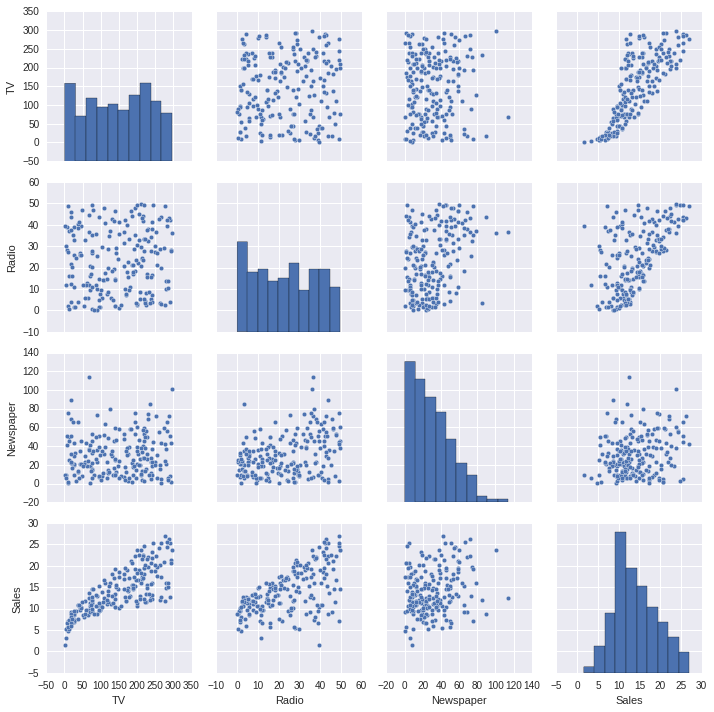

In [37]:
sns.pairplot(advertising)

In [38]:
# What are the min/max values of Radio & TV?
# Use these values to set up the grid for plotting.
advertising[['Radio', 'TV']].describe()

,Radio,TV
count,200.000000,200.000000
mean,23.264000,147.042500
std,14.846809,85.854236
min,0.000000,0.700000
25%,9.975000,74.375000
50%,22.900000,149.750000
75%,36.525000,218.825000
max,49.600000,296.400000


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = advertising[['Radio', 'TV']].as_matrix()
y = advertising['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)


print(linreg.coef_)
print(linreg.intercept_)

[ 0.18117959  0.04660234]
2.92723732027


In [40]:
import numpy as np

# Create a coordinate grid
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =(linreg.intercept_ + B1[i,j]*linreg.coef_[0] + B2[i,j]*linreg.coef_[1])

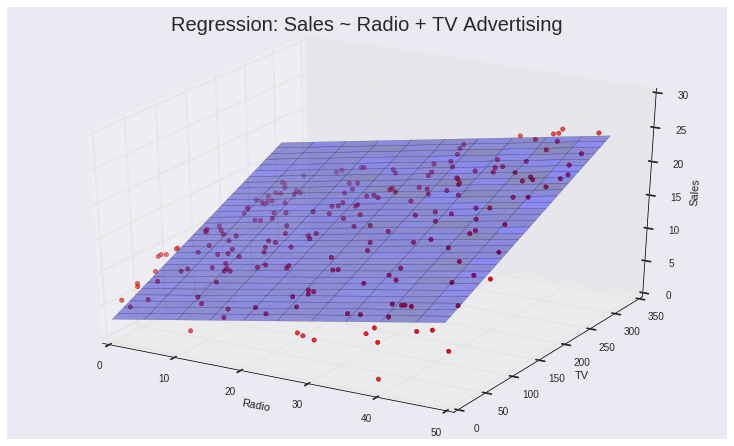

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(advertising.Radio, advertising.TV, advertising.Sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales');

----
## Up to now...

- How to use **`Pandas`** library to read data?
- How to use **`Seaborn`** library to visualize data?
- What is **linear regression**, and how does it work?
- What are some **evaluation metrics** for regression problems?
- How to **train** and **interpret** a linear regression model in **`Scikit-learn`**?
- How to choose **which features to include** in the **linear model**?

## Comments or Questions?

- Email: <cross224@hotmail.com>
- Github: [@carap](https://github.com/carap)